In [13]:
%matplotlib inline
import numpy as np
import math
from copy import copy, deepcopy
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.animation as animation
from IPython.display import HTML
from functools import reduce
animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']

In [305]:
def simulated_annealing(T, E, step, step_back = None, s_p = 0.3, p = 0.9999, iters = 10000, anim_step = None, debug_step = None):
    i = 0
    i_x = []
    i_y = []
    cT = deepcopy(T)
    anim = []
    cp = s_p
    best = deepcopy(T)
    Eb = E(best)
    equals = 0
    while i < iters and equals < 3000:
        if step_back == None:
            to_restore = deepcopy(cT)
        
        Ep = E(cT)
        step_prop = step(cT)
        En = E(cT)
        if En > Ep and random.random() > cp:
            if step_back == None:
                cT = to_restore
            else:
                step_back(cT, *step_prop) 
                En = Ep
        
        if Eb > En:
            best = deepcopy(cT)
            Eb = En
        
        if Ep == En:
            equals += 1
        else:
            equals = 0
        
        i_x.append(i)
        i_y.append(E(cT))
        
        if anim_step != None and i % anim_step == 0:
            anim.append(deepcopy(cT))
        
        if debug_step != None and i % debug_step == 0:
            print("SA step ", i)
        
        cp *= p
        i += 1
    return best, i_x, i_y, anim

# TSP

In [ ]:
def generate_random_points(n, a = 100):
    return [(random.random()*a, random.random()*a) for i in range(n)]

In [ ]:
def show(points):
    x = list(map(lambda x: x[0], points))
    y = list(map(lambda x: x[1], points))
    plt.plot(x, y)
    plt.show()

In [ ]:
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [ ]:
def E(points):
    E = 0
    for i in range(len(points)):
        E += dist(points[i], points[(i+1)%len(points)])
    return E

In [ ]:
def make_swap(points):
    i = random.randint(0, len(points)-1)
    j = random.randint(0, len(points)-1)
    points[i], points[j] = points[j], points[i]
    return i, j

In [ ]:
def make_swap_neigh(points):
    i = random.randint(0, len(points)-2)
    points[i], points[i+1] = points[i+1], points[i]
    return i, i + 1

In [ ]:
def make_back_swap(points, i, j):
    points[i], points[j] = points[j], points[i]

In [ ]:
def TSP():
    N = 500
    MAX_ITERS = 10000
    points = generate_random_points(N, 1000)
    show(points)
    points, i_x, i_y = simulated_annealing(points, E, make_swap, make_back_swap, p = 0.99999, iters=100000)
    show(points)
    return i_x, i_y
    
i_x, i_y = TSP()

In [ ]:
plt.plot(i_x, i_y)
plt.show()

# Binary Images

In [244]:
def random_image(w,h,p=0.3):
    img = np.array([0 if random.random() > p else 1 for i in range(w*h)])
    return np.reshape(img, (w, h))

In [245]:
def show_image(img):
    imgplot = plt.imshow(img, cmap = mpl.cm.Greys)
    plt.show()

In [246]:
def show_anim(anim):
    fig = plt.figure()
    ims = []
    for img in anim:
        im = plt.imshow(img, cmap = mpl.cm.Greys, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False,repeat_delay=10000)
    plt.close()
    display(HTML(ani.to_html5_video()))

In [247]:
def make_img_swap(img):
    w,h = np.shape(img)
    i1 = random.randint(0,w - 1)
    j1 = random.randint(0,h - 1)
    i2 = random.randint(0,w - 1)
    j2 = random.randint(0,h - 1)
    img[i1][j1], img[i2][j2] = img[i2][j2], img[i1][j1]
    return i1, j1, i2, j2

In [248]:
def make_img_back_swap(img, i1, j1, i2, j2):
    img[i1][j1], img[i2][j2] = img[i2][j2], img[i1][j1]

In [275]:
def generate(E, p=0.2):
    img = random_image(100,100,p)
    show_image(img)
    res_img, i_x, i_y, anim = simulated_annealing(img, E, make_img_swap, make_img_back_swap, p=0.9995, iters=1000, anim_step=10, debug_step=100)
    show_image(res_img)
    show_anim(anim)
    plt.plot(i_x, i_y)
    plt.show()

## Wyspy

In [277]:
def E_wyspowe(img):
    sum = 0
    w, h = np.shape(img)
    for i in range(1,w-1):
        for j in range(1,h-1):
            sum += img[i][j]*(2**(img[i-1][j] + img[i][j-1] + img[i+1][j] + img[i][j+1]))
    return -sum

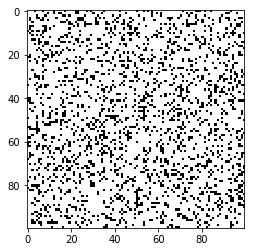

SA step  0
SA step  100
SA step  200
SA step  300
SA step  400
SA step  500
SA step  600
SA step  700
SA step  800
SA step  900


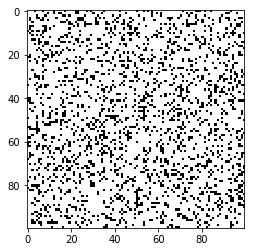

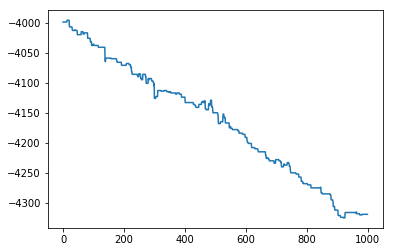

In [278]:
generate(E_wyspowe)

## Szachownica

In [ ]:
def E_szachowe(img):
    sum = 0
    w, h = np.shape(img)
    for i in range(1,w-1):
        for j in range(1,h-1):
            sum += (1 - img[i][j])*(2**(img[i-1][j] + img[i][j-1] + img[i+1][j] + img[i][j+1]))
    return -sum

In [ ]:
generate(E_szachowe, p=0.5)

# Sudoku

In [3]:
qs = np.load('sudokus/sudoku_quizzes.npy')[:52]

In [196]:
def init(S):
    #cS = [a if a != 0 else random.randint(1,9) for a in np.reshape(S, -1)]
    #return np.reshape(cS, S.shape)
    _, was = np.unique(S, return_counts=True)
    was = 9 - was
    cS = deepcopy(S)
    c = 1
    is_static = np.zeros(S.shape)
    for i in range(len(cS)):
        for j in range(len(cS[i])):
            while c < len(was) and was[c] == 0:
                c += 1
            if cS[i][j] == 0:
                cS[i][j] = c
                was[c] -= 1
            else:
                is_static[i][j] = 1
    return cS, is_static

In [391]:
def check(S):
    val, was = np.unique(S, return_counts=True)
    err = 0
    for i in range(len(was)):
        err += abs(1-was[i])*val[i]
    return err

In [389]:
def E(S):
    e = 0
    for i in range(len(S)):
        e += check(S[i])
        e += check(S[:,i])
        
    for i in range(0,len(S),3):
        for j in range(0,len(S[i]),3):
            e += check(np.reshape(S[i:i+3,j:j+3],-1))
            
    return e

In [316]:
def get_swaps(S, is_static):
    def make_sudoku_swap(S):
        w, h = S.shape
        i1 = random.randint(0,w - 1)
        j1 = random.randint(0,h - 1)
        i2 = random.randint(0,w - 1)
        j2 = random.randint(0,h - 1)
        if is_static[i1][j1] == 0 and is_static[i2][j2] == 0: 
            S[i1][j1], S[i2][j2] = S[i2][j2], S[i1][j1]
            return i1, j1, i2, j2
        else:
            return i1, j1, i1, j1
    
    def make_sudoku_back_swap(S, i1, j1, i2, j2):
        S[i1][j1], S[i2][j2] = S[i2][j2], S[i1][j1]
    
    return make_sudoku_swap, make_sudoku_back_swap

In [317]:
def get_single_changes(S, is_static):
    def make_sudoku_swap(S):
        w, h = S.shape
        i1 = random.randint(0,w - 1)
        j1 = random.randint(0,h - 1)
        prev = S[i1][j1]
        if is_static[i1][j1] == 0: 
            S[i1][j1] = random.randint(1,9)
        return i1, j1, prev
    
    def make_sudoku_back_swap(S, i1, j1, val):
        S[i1][j1] = val
    
    return make_sudoku_swap, make_sudoku_back_swap

In [394]:
def solve(q):
    S, is_static = init(q)
    iter = 1
    best = deepcopy(S)
    cS = deepcopy(S)
    s_x = [0]
    s_y = [E(S)]
    last = E(S)
    lastc = 0
    after_new = True
    while E(best) != 0 and iter < 30:
        S, i_x, i_y, _ = simulated_annealing(S, E, *get_swaps(S, is_static), 
                                             s_p=0.25 if after_new else 0.005, p=0.9998, iters=30000)
        after_new = False
        i_x = list(map(lambda x: x + s_x[-1], i_x))
        s_x += i_x
        s_y += i_y
        if E(S) < E(best):
            best = deepcopy(S)
            
        if last == E(S):
            lastc += 1
        else:
            lastc = 0
        
        if lastc >= 5:
            S = deepcopy(cS)
            after_new = True
            
        print("Iteration ",iter, " completed, result: ", E(S))
        print(S)
        plt.plot(s_x, s_y)
        plt.show()
        iter += 1
    print("It took ", iter - 1)
    return best, s_x, s_y    

Iteration  1  completed, result:  26
[[1 8 4 3 7 5 2 6 9]
 [3 6 5 2 4 9 8 5 1]
 [9 7 2 8 6 1 7 4 3]
 [2 3 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


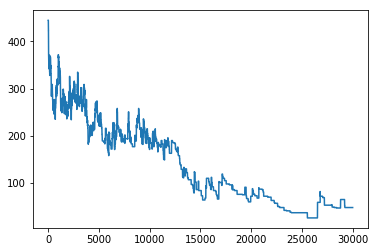

Iteration  2  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


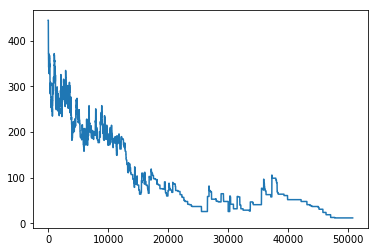

Iteration  3  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


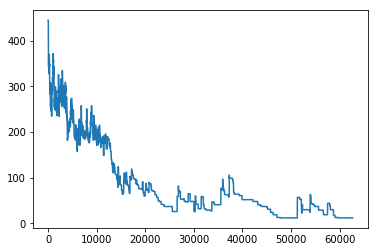

Iteration  4  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


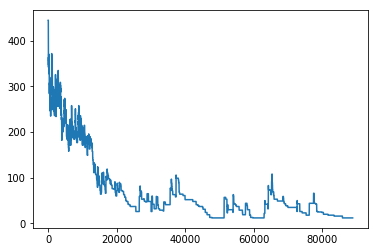

Iteration  5  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


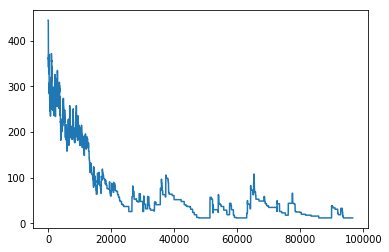

Iteration  6  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


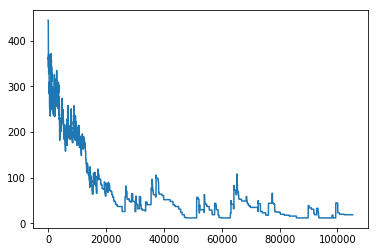

Iteration  7  completed, result:  12
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 2 4 9 8 6 1]
 [9 7 1 8 6 5 7 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 1 5 7 4 3 6]
 [4 5 7 6 8 3 9 1 2]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


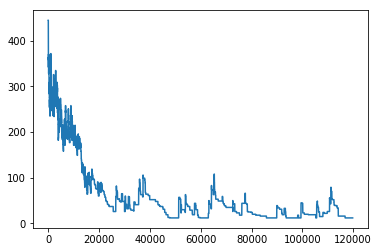

Iteration  8  completed, result:  3
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [4 5 7 1 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


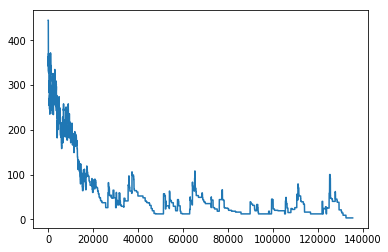

Iteration  9  completed, result:  3
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [4 5 7 1 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


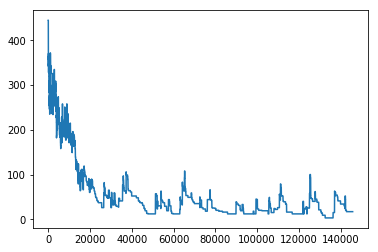

Iteration  10  completed, result:  3
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [4 5 7 1 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


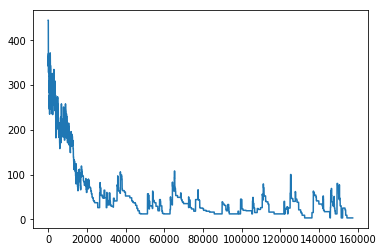

Iteration  11  completed, result:  3
[[8 6 4 3 7 1 2 5 9]
 [2 3 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [3 2 6 4 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [4 5 7 1 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


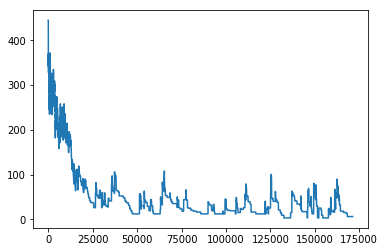

Iteration  12  completed, result:  0
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


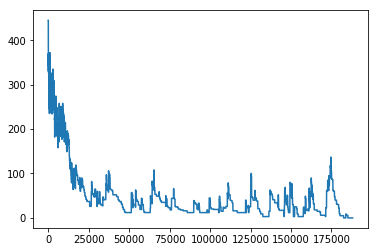

It took  13


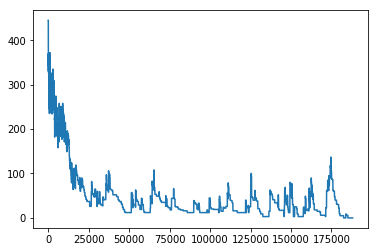

In [395]:
S, i_x, i_y = solve(qs[0])
plt.plot(i_x, i_y)
plt.show()

In [392]:
E(np.array([[8, 6, 4, 3, 7, 1, 2, 5, 9],
 [2, 3, 5, 8, 4, 9, 7, 6, 1],
 [9, 7, 1, 2, 6, 5, 8, 4, 3],
 [3, 2, 6, 4, 9, 2, 5, 8, 7],
 [1, 9, 8, 1, 5, 7, 4, 3, 6],
 [4, 5, 7, 6, 8, 3, 9, 1, 2],
 [6, 8, 9, 7, 3, 4, 1, 2, 5],
 [7, 1, 3, 5, 2, 8, 6, 9, 4],
 [5, 4, 2, 9, 1, 6, 3, 7, 8]]))

3